In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.api import OLS
from statsmodels.tsa.stattools import coint

In [30]:
# GLD: Gold ETF, PAXG: Physical Gold Token
paxg = yf.download('PAXG-USD', start='2023-01-01', end='2023-02-20', interval='5m')
gold = yf.download('GLD', start='2023-01-01', end='2023-02-20', interval='5m')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [31]:
paxg.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-01 00:00:00+00:00,1819.597168,1820.372559,1819.597168,1820.300537,1820.300537,0
2023-01-01 00:05:00+00:00,1820.193237,1820.193237,1819.986938,1819.986938,1819.986938,0
2023-01-01 00:10:00+00:00,1820.185547,1820.252319,1820.151733,1820.151733,1820.151733,9805
2023-01-01 00:15:00+00:00,1820.008789,1820.008789,1819.517822,1819.517822,1819.517822,1662
2023-01-01 00:20:00+00:00,1820.189087,1820.189087,1820.067139,1820.105591,1820.105591,0


In [32]:
# Merge the datasets on the datetime column
df = pd.merge(paxg, gold, on='Datetime')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2560 entries, 2023-01-03 14:30:00+00:00 to 2023-02-17 21:00:00+00:00
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open_x       2560 non-null   float64
 1   High_x       2560 non-null   float64
 2   Low_x        2560 non-null   float64
 3   Close_x      2560 non-null   float64
 4   Adj Close_x  2560 non-null   float64
 5   Volume_x     2560 non-null   int64  
 6   Open_y       2560 non-null   float64
 7   High_y       2560 non-null   float64
 8   Low_y        2560 non-null   float64
 9   Close_y      2560 non-null   float64
 10  Adj Close_y  2560 non-null   float64
 11  Volume_y     2560 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 260.0 KB


In [23]:
# Remove the time from the Date columns and only keep the date
paxg['Date'] = paxg.index.date
gold['Date'] = gold.index.date

In [20]:
# Make sure PAXG only contains the dates that are in gold. Only check that it is the same day, not the same time.
paxg = paxg[paxg['Date'].isin(gold['Date'])]

In [21]:
paxg.info()
gold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9434 entries, 2023-01-03 00:00:00+00:00 to 2023-02-17 23:55:00+00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9434 non-null   float64
 1   High       9434 non-null   float64
 2   Low        9434 non-null   float64
 3   Close      9434 non-null   float64
 4   Adj Close  9434 non-null   float64
 5   Volume     9434 non-null   int64  
 6   Date       9434 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 589.6+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2575 entries, 2023-01-03 09:30:00-05:00 to 2023-02-17 16:00:00-05:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2575 non-null   float64
 1   High       2575 non-null   float64
 2   Low        2575 non-null   float64
 3   Close      2575 non-null   float64
 4   Adj Close  2575 non-nul

In [37]:
# Set the Date column to the index
paxg.set_index('Date', inplace=True)
gold.set_index('Date', inplace=True)

KeyError: "None of ['Datetime'] are in the columns"

In [7]:
paxg.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1960.363281,2026.051025,1957.371094,1997.985229,1997.985229,8343112
2021-01-05,1998.678589,2077.026855,1998.216675,2020.681396,2020.681396,9875627
2021-01-06,2020.596558,2022.653687,1934.655029,1962.541748,1962.541748,8907860
2021-01-07,1962.161377,1975.563232,1930.048462,1953.222534,1953.222534,10078742
2021-01-08,1952.402344,1955.871948,1851.239502,1875.866333,1875.866333,12024145


In [8]:
gold.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,181.970001,182.399994,180.960007,182.330002,182.330002,14331400
2021-01-05,182.869995,183.210007,181.820007,182.869995,182.869995,12718800
2021-01-06,181.490005,181.580002,178.240005,179.899994,179.899994,18453500
2021-01-07,179.690002,179.919998,178.839996,179.479996,179.479996,7110200
2021-01-08,176.830002,176.990005,171.479996,173.339996,173.339996,24399900


In [38]:
df = pd.merge(paxg, gold, on='Datetime', suffixes=('_PAXG', '_GLD'))
df.head()

,Open_PAXG,High_PAXG,Low_PAXG,Close_PAXG,Adj Close_PAXG,Volume_PAXG,Open_GLD,High_GLD,Low_GLD,Close_GLD,Adj Close_GLD,Volume_GLD
Datetime,,,,,,,,,,,,
2023-01-03 14:30:00+00:00,1834.114014,1834.114014,1833.423828,1833.423828,1833.423828,33308,171.229996,171.740005,171.139999,171.630005,171.630005,597278
2023-01-03 14:35:00+00:00,1834.698486,1834.916016,1834.698486,1834.916016,1834.916016,108241,171.619995,171.880005,171.564697,171.820007,171.820007,211303
2023-01-03 14:40:00+00:00,1835.459839,1836.100220,1835.459839,1836.100220,1836.100220,19595,171.860001,172.059998,171.850006,171.910004,171.910004,310425
2023-01-03 14:45:00+00:00,1835.816406,1835.816406,1835.458496,1835.458496,1835.458496,0,171.871704,172.029907,171.845001,171.970001,171.970001,212286
2023-01-03 14:50:00+00:00,1835.187866,1835.187866,1834.130737,1834.177002,1834.177002,394255,171.970001,172.089996,171.789993,171.854996,171.854996,372194


In [39]:
# Determine the hedge ratio
"""
Using statsmodels OLS to find the hedge ratio.
Where the slope of the regression line (line that minimizes the sum of the squared residuals) from OLS is the hedge ratio.
"""
model = OLS(df['Adj Close_PAXG'], df['Adj Close_GLD'])
results = model.fit()
hedge_ratio = results.params[0]
print(f'hedge ratio: {hedge_ratio}')

hedge ratio: 10.661775786008011


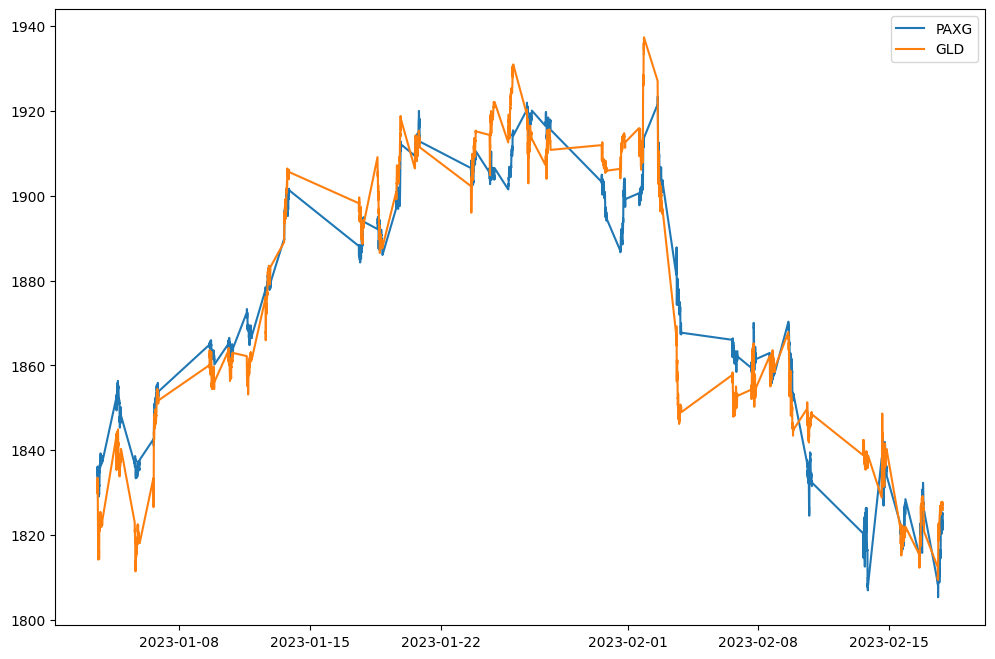

In [41]:
# Plot the two time series against one another
plt.figure(figsize=(12, 8))
plt.plot(df['Adj Close_PAXG'], label='PAXG')
plt.plot(df['Adj Close_GLD'] * hedge_ratio, label='GLD')
plt.legend()
plt.show()

In [43]:
# Calculate the spread
spread = df['Adj Close_PAXG'] - df['Adj Close_GLD'] * hedge_ratio

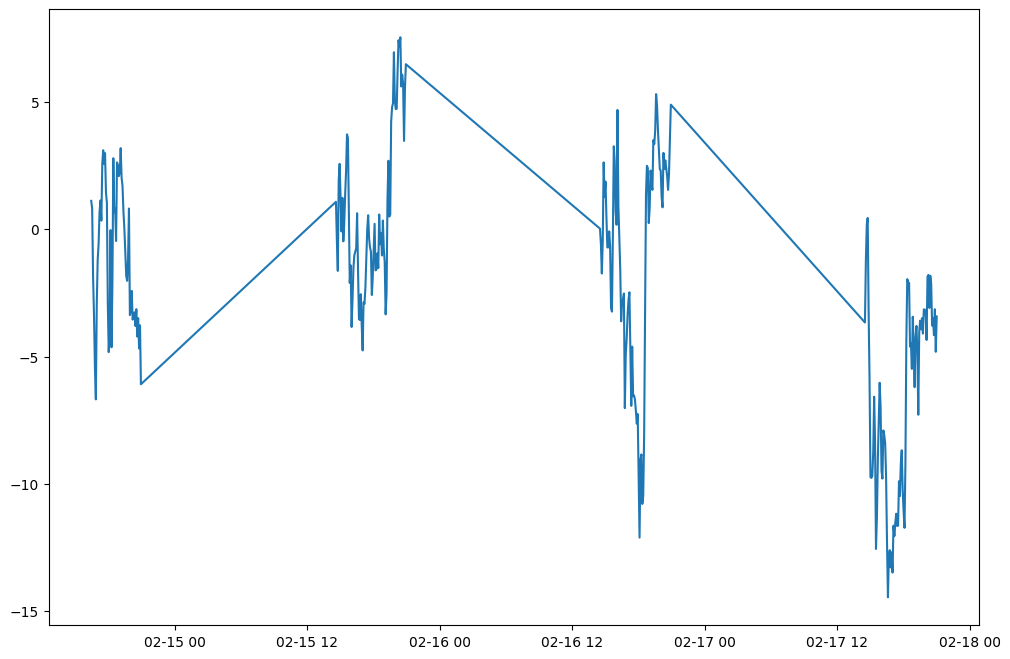

In [50]:
# Plot the spread of the time series for the last day
plt.figure(figsize=(12, 8))
plt.plot(spread[-288:])
plt.show()

In [55]:
# Calculate the bollinger bands on the spread
zs = 2
upper_band = spread.rolling(20).mean() + zs * spread.rolling(20).std()
lower_band = spread.rolling(20).mean() - zs * spread.rolling(20).std()
mean = spread.rolling(20).mean()

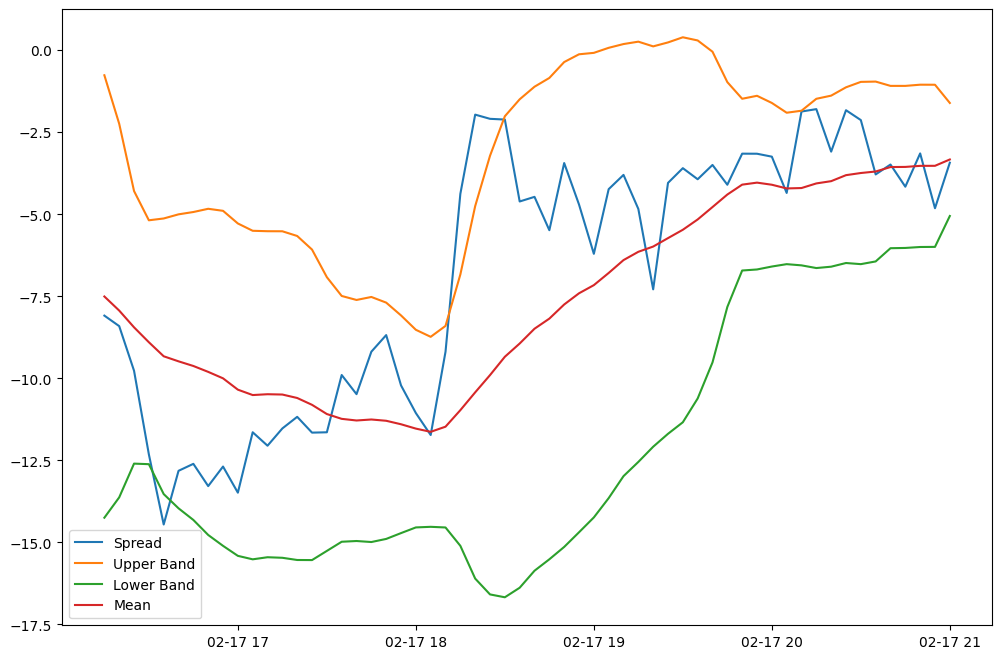

In [56]:
# Plot the spread with the bollinger bands for the last day
plt.figure(figsize=(12, 8))
plt.plot(spread[-58:], label='Spread')
plt.plot(upper_band[-58:], label='Upper Band')
plt.plot(lower_band[-58:], label='Lower Band')
plt.plot(mean[-58:], label='Mean')
plt.legend()
plt.show()

In [47]:
# coint_t: Cointegration test statistic (t-statistic) for the null hypothesis that the two series are not cointegrated.
# pvalue: MacKinnon's approximate p-value
# crit_value: Critical values for the test statistic at the 1 %, 5 %, and 10 % levels.
coint_t, pvalue, crit_value = coint(
    df['Adj Close_PAXG'], df['Adj Close_GLD']
    )
print(f'cointegration test statistic: {coint_t}')
print(f'p-value: {pvalue}')
print(f'critical values: {crit_value}')

cointegration test statistic: -3.336603963238283
p-value: 0.04989588662626985
critical values: [-3.90072488 -3.33851873 -3.04610778]


In [63]:
# Make a dataframe that stores as columns a ticket_assignee (string), ticket_warnings (int), bad_tickets (int), and an entry_date (datetime.date). Do not insert any data. Include types for the columns.
df=pd.DataFrame(columns={'ticket_assignee':str,'ticket_warnings':int,'bad_tickets':int,'entry_date':pd.Timestamp})
df.head()

,ticket_assignee,ticket_warnings,bad_tickets,entry_date


In [88]:
# Enter dummy data in 10 rows. make the entry_date now
df.loc[0] = ['John', 0, 4, pd.Timestamp.now()]
df.loc[1] = ['John', 0, 0, pd.Timestamp.now()]
df.loc[2] = ['John', 0, 7, pd.Timestamp.now()]
df.loc[3] = ['John', 0, 0, pd.Timestamp.now()]
df.loc[4] = ['John', 0, 0, pd.Timestamp.now()]
df.loc[5] = ['John', 3, 0, pd.Timestamp.now()]
df.loc[6] = ['John', 0, 0, pd.Timestamp.now()]
df.loc[7] = ['John', 0, 0, pd.Timestamp.now()]
df.loc[8] = ['John', 1, 0, pd.Timestamp.now()]
df.loc[9] = ['John', 0, 0, pd.Timestamp.now()]
df.head()

,ticket_assignee,ticket_warnings,bad_tickets,entry_date
0,John,0,4,2023-03-01 15:58:24.538742
1,John,0,0,2023-03-01 15:58:24.542737
2,John,0,7,2023-03-01 15:58:24.546774
3,John,0,0,2023-03-01 15:58:24.548356
4,John,0,0,2023-03-01 15:58:24.549793


In [84]:
df.head()

,ticket_assignee,ticket_warnings,bad_tickets,entry_date
0,John,0,4,2023-03-01 15:57:57.625607
1,John,0,0,2023-03-01 15:57:57.657694
2,John,0,7,2023-03-01 15:57:57.658039
3,John,0,0,2023-03-01 15:57:57.658230
4,John,0,0,2023-03-01 15:57:57.658409


In [ ]:
# convert entry_date to a datetime


In [85]:
# Delete entries in the dataframe where the entry_date is today
df = df[df['entry_date'] != pd.Timestamp.today().date()]

/var/folders/rs/k8yvpht95zxbr8d7v79msjk00000gn/T/ipykernel_72444/3680041632.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df = df[df['entry_date'] != pd.Timestamp.today().date()]


In [86]:
# Enter a record dated as today
df.loc[len(df)] = ['John', 0, 0, pd.Timestamp.now()]

In [95]:
df.head(50)

,ticket_assignee,ticket_warnings,bad_tickets,entry_date
0,John,0,4,2023-03-01
1,John,0,0,2023-03-01
2,John,0,7,2023-03-01
3,John,0,0,2023-03-01
4,John,0,0,2023-03-01
5,John,3,0,2023-03-01
6,John,0,0,2023-03-01
7,John,0,0,2023-03-01
8,John,1,0,2023-03-01
9,John,0,0,2023-03-01


In [101]:
# Convert the entry_date column to a datetime



11

In [109]:
# Get a list of all the unique assigees in the dataframe 
assignees = df['ticket_assignee'].unique()

for assignee in assignees:
    # Calculate the number of bad tickets today
    bad_tickets = df[(df['ticket_assignee'] == assignee) & (df['entry_date'] == pd.Timestamp.today().date())]['bad_tickets'].sum()
    # Calculate the number of bad tickets yesterday
    bad_tickets_yesterday = df[(df['ticket_assignee'] == assignee) & (df['entry_date'] == pd.Timestamp.today().date() - pd.Timedelta(days=1))]['bad_tickets'].sum()
    # Calculate the average over the last week
    avg_bad_tickets = df[(df['ticket_assignee'] == assignee) & (df['entry_date'] >= pd.Timestamp.today().date() - pd.Timedelta(days=7))]['bad_tickets'].mean()

# # Get the number of bad tickets for those assignees today
# bad_tickets = df[df['ticket_assignee'].isin(assignees) & (df['entry_date'] == pd.Timestamp.today().date())]['bad_tickets'].sum()
# # Get the average number of bad tickets for those assignees over the last 7 days
# avg_bad_tickets = df[df['ticket_assignee'].isin(assignees) & (df['entry_date'] >= pd.Timestamp.today().date() - pd.Timedelta(days=7))]['bad_tickets'].mean()
# avg_bad_tickets